### Daniel Espinosa 136981

## Tarea KNN

In [43]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from math import fabs
from __future__ import division
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
from random import uniform

Creación de los datos uniformes:

In [6]:
data = np.random.rand(1000,2)*8-4
data

array([[ 0.18419984, -1.79157999],
       [ 0.25454588,  2.9971498 ],
       [-2.60598827, -0.48575876],
       ..., 
       [-0.38517475, -0.39869668],
       [-0.42504255, -1.05166953],
       [ 3.64939271,  1.38414105]])

In [19]:
y = [0]*1000 # arreglo de 1000 ceros

Definir círculos y etiquetar a los puntos que caigan en ellos.

In [20]:
for i in range(len(data)):
    if((data[i][0])**2+(data[i][1]+2)**2<=1 or 
      (data[i][0]-3)**2+(data[i][1]-1)**2<=0.75 or
      (data[i][0]+2)**2+(data[i][1]-1.5)**2<=0.5 or
      (data[i][0]-0.5)**2+(data[i][1]-2.5)**2<=0.5):
        y[i] = 1

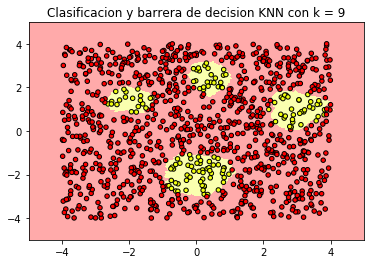

In [51]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FAFFAF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#F0FF0F'])

# 9 vecinos y weights uniformes
clfknn = neighbors.KNeighborsClassifier(9, weights='uniform')
clfknn.fit(data, y)

# Fronteras de decision
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
Z = clfknn.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Clasificacion y barrera de decision KNN con k = 9")

plt.show()

Comparación contra SVM

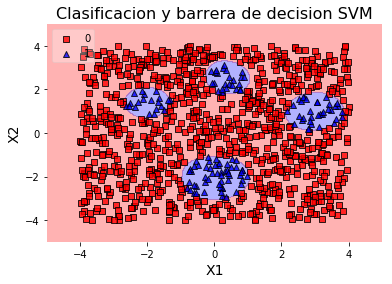

In [47]:
clfsvm = SVC(C = 10)
clfsvm.fit(data, y)
Xdf = pd.DataFrame(data=data)
Ydf = pd.DataFrame(data=y)


plot_decision_regions(X=Xdf.values, 
                      y=Ydf.values.ravel(),
                      clf=clfsvm, 
                      legend=2)

plt.xlabel("X1", size=14)
plt.ylabel("X2", size=14)

plt.title('Clasificacion y barrera de decision SVM', size=16)
plt.show()

In [49]:
print "Matriz de confusión KNN:"
print confusion_matrix(y,clfknn.predict(Xdf).tolist())

Matriz de confusión KNN:
[[855  10]
 [  6 129]]


In [48]:
print "Matriz de confusión SVM:"
print confusion_matrix(y,clfsvm.predict(Xdf).tolist())

Matriz de confusión SVM:
[[864   1]
 [  3 132]]


Evidentemente ambos modelos funcionan bien y KNN es mejor modelo de lo que yo creía. SVM es un mejor modelo ya que tiene muy pocos resultados falsos.

Se debe tomar en consideración que KNN es un modelo muy difícil de ejecutar por su alta complejidad computacional al computar una predicción. (Pues tiene que calcular las distancias, ordenar y promediar).